In [0]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/c2ipshxsua325lon3uvotlwckqtoyt')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [0]:
df = df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin','MCP.1','Classification']].astype('int')

In [4]:
X = np.asarray(df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin','MCP.1']])
X[0:5]

array([[ 48,  23,  70,   2,   0,   8,   9,   7, 417],
       [ 83,  20,  92,   3,   0,   8,   5,   4, 468],
       [ 82,  23,  91,   4,   1,  17,  22,   9, 554],
       [ 68,  21,  77,   3,   0,   9,   7,  12, 928],
       [ 86,  21,  92,   3,   0,   6,   4,  10, 773]])

In [5]:
y = np.asarray(df['Classification'])
y [0:5]

array([1, 1, 1, 1, 1])

In [6]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.57979363, -0.81909568, -1.23922225, -0.75098111, -0.59935992,
        -0.94655084, -0.10341507, -0.58590571, -0.34010853],
       [ 1.60182096, -1.41667491, -0.25829943, -0.65107996, -0.59935992,
        -0.94655084, -0.68859303, -0.82863807, -0.19203066],
       [ 1.53948912, -0.81909568, -0.30288683, -0.5511788 , -0.32670992,
        -0.47553126,  1.7984133 , -0.42408413,  0.05766927],
       [ 0.66684328, -1.21748183, -0.92711044, -0.65107996, -0.59935992,
        -0.89421534, -0.39600405, -0.18135177,  1.14357362],
       [ 1.7888165 , -1.21748183, -0.25829943, -0.65107996, -0.59935992,
        -1.05122186, -0.83488752, -0.34317334,  0.69353305]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81, 9) (81,)
Test set: (35, 9) (35,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
yhat = LR.predict(X_test)
yhat

array([2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2])

In [10]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.4551151 , 0.5448849 ],
       [0.50881109, 0.49118891],
       [0.55312865, 0.44687135],
       [0.51422356, 0.48577644],
       [0.51032264, 0.48967736],
       [0.43178364, 0.56821636],
       [0.49012995, 0.50987005],
       [0.50095804, 0.49904196],
       [0.50992692, 0.49007308],
       [0.51338547, 0.48661453],
       [0.49403795, 0.50596205],
       [0.50858916, 0.49141084],
       [0.53508465, 0.46491535],
       [0.46807178, 0.53192822],
       [0.43776045, 0.56223955],
       [0.50172157, 0.49827843],
       [0.50803444, 0.49196556],
       [0.50012431, 0.49987569],
       [0.46962877, 0.53037123],
       [0.52347675, 0.47652325],
       [0.52482269, 0.47517731],
       [0.56999074, 0.43000926],
       [0.53849364, 0.46150636],
       [0.45621496, 0.54378504],
       [0.42818583, 0.57181417],
       [0.54735986, 0.45264014],
       [0.36513417, 0.63486583],
       [0.48192834, 0.51807166],
       [0.48328033, 0.51671967],
       [0.41700287, 0.58299713],
       [0.

In [11]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8285714285714286

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[15  2]
 [ 4 14]]


Confusion matrix, without normalization
[[15  2]
 [ 4 14]]


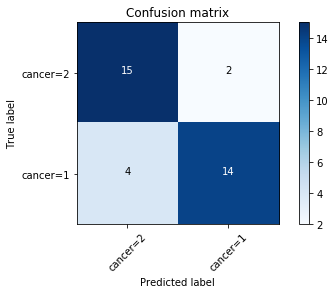

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['cancer=2','cancer=1'],normalize= False,  title='Confusion matrix')

In [14]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.79      0.88      0.83        17
           2       0.88      0.78      0.82        18

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



In [15]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.647996306408727